In [160]:
import numpy as np, matplotlib.pyplot as plt, pandas as pd

# values from known peaks only (H+ and Ar+ and Ar++)
m_z = np.array([1,1,1,40,40,40, 20, 20, 20]) #16,16
tof = np.array([0.4549,0.4489,0.4509,1.2609,1.3449,1.24689, 0.9389, 0.9369, 0.9389]) #,1.2869,1.2849

# peaks of ch4+ (guesses) were eliminated because of wrong resultant mass spectrum [commented out above] 

# fitting to a degree two polynomial
coefficients = np.polyfit(tof, m_z, 2)
# coefficients A, b, c for a quadratic curve is yielded
A = coefficients[0]
B = coefficients[1]
C = coefficients[2]



       2
17.08 x + 16.7 x - 10.13


Text(0.5, 1.0, 'Calibration using quadratic best fit')

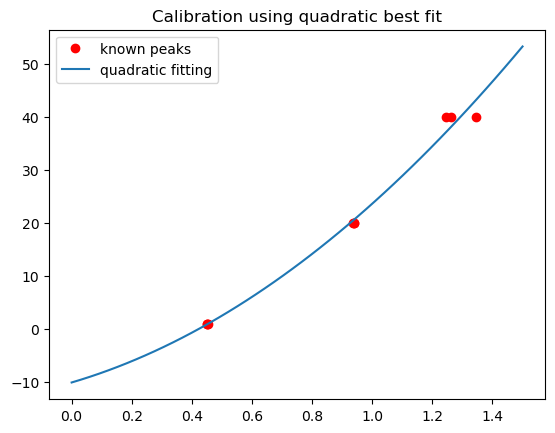

In [161]:
polynomial_fn = np.poly1d(coefficients)
print(polynomial_fn) 

# this yeilds the following function :
# m/z = at^2 + bt + c 
# thus, now we have the m/z ratios corresponding to the values of tof

x = np.linspace(0, 1.5, 50)

plt.plot(tof, m_z, "or" ,label = "known peaks")
plt.plot(x, A*x**2 + B*x + C, label = "quadratic fitting")

plt.legend()
plt.title("Calibration using quadratic best fit")




In [162]:
# extracting data for methane from a particular file 
filepath = "./Lab Data/Data_240619/24-06-19_46_ch2.txt"
data = np.loadtxt(filepath, delimiter= " ")

print(data)

tof_array = data[:,0]
intensity = data[:,1]

[[9.0000e-04 0.0000e+00]
 [2.9000e-03 0.0000e+00]
 [4.9000e-03 0.0000e+00]
 ...
 [4.9989e+00 0.0000e+00]
 [5.0009e+00 0.0000e+00]
 [5.0029e+00 1.0000e+00]]


In [163]:
# creating a m/z array parallel to tof array
m_z_array = polynomial_fn(tof_array)
m_z_array

array([-10.11244805, -10.07891706, -10.04524942, ..., 500.21793938,
       500.59297273, 500.96814274])

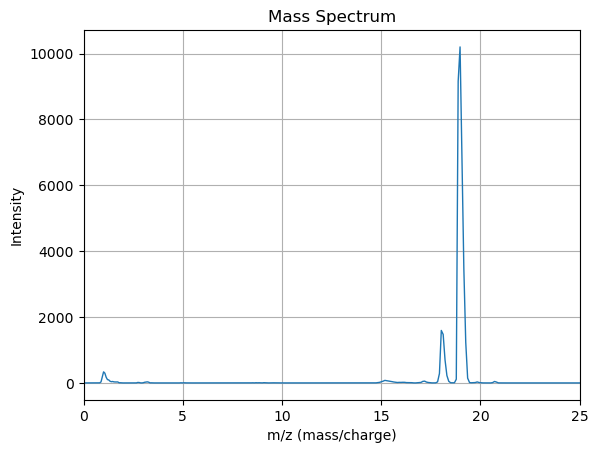

In [165]:
# plotting intensity against m/z values to verify
plt.plot(m_z_array, intensity, linewidth = 1.0)
plt.xlabel('m/z (mass/charge)')
plt.ylabel('Intensity')
plt.title('Mass Spectrum')
plt.grid(True)

plt.xlim(0,25)
# plt.ylim(0,5000)
plt.show()


